# 利用Python进行数据分析
## 开始之前
先介绍一下接下来会用到的几类库。

* Numpy（Numerical Python）
    * 提供了高效的多维数组对象ndarray，效率至少是Python原生的5倍
    * 科学计算
    * 粘合剂
    * 数值型数据的处理效率比内置结构更高效
* Pandas 熊猫包
* Matplotlib
* SciPy
    * 科学计算
    虽然MATLAB很厉害，但是NP+SP可以完爆MATLAB

## 安装问题
**Anaconda + PyCharm**
### 为何使用Anaconda
答：否则配置要你命。
Anaconda自带了IPython、Jupyter Notebook、Jupyter Qtconsole还有各类包，非常实用。

## 关于社区习惯
Python引入库的时候，有社区习惯，以代码直接解释

In [16]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


### 看看IPython的优势のPylab

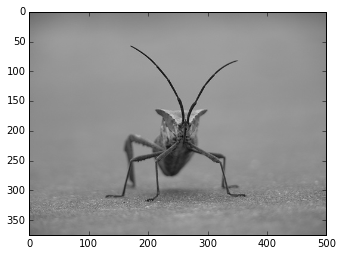

In [18]:
img = plt.imread('E:\PyAna\pydata-book-master\ch03\stinkbug.png')
imshow(img)

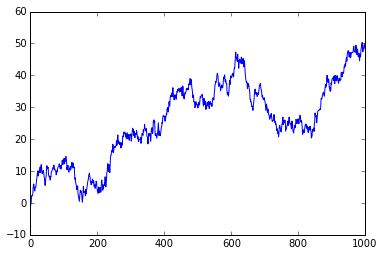

In [20]:
plot(randn(1000).cumsum())

## 以例子作为开始

注： 本节将使用到json库，json是一种数据格式

### 首先我们用Python原生尝试进行数据分析

In [2]:
path = 'E:\PyAna\pydata-book-master\ch02\usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
records = [json.loads(line) for line in open(path)]

In [7]:
print records[0],"\n"
print records[0]['tz']

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', u'c': u'US', u'nk': 1, u'tz': u'America/New_York', u'gr': u'MA', u'g': u'A6qOVH', u'h': u'wfLQtf', u'cy': u'Danvers', u'l': u'orofrog', u'al': u'en-US,en;q=0.8', u'hh': u'1.usa.gov', u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991', u't': 1331923247, u'hc': 1331822918, u'll': [42.576698, -70.954903]} 

America/New_York


In [8]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
print time_zones[:10]

[u'America/New_York', u'America/Denver', u'America/New_York', u'America/Sao_Paulo', u'America/New_York', u'America/New_York', u'Europe/Warsaw', u'', u'', u'']


In [9]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
        return counts

In [10]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # rec all value to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [11]:
counts = get_counts(time_zones)
counts2 = get_counts(time_zones)
print counts,'\n',counts2,'\n',counts['America/New_York'],'\n',len(time_zones)

{u'America/New_York': 1} 
{u'America/New_York': 1} 
1 
3440


上述的操作，相对而言是一件比较麻烦的事情，不如尝试一下利用Pandas
### Pandas的处理方法

In [12]:
frame = pd.DataFrame(records)
print frame
print frame['tz'][:10]

      _heartbeat_                                                  a  \
0             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1             NaN                             GoogleMaps/RochesterNY   
2             NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
3             NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...   
4             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
5             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
6             NaN  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...   
7             NaN  Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...   
8             NaN  Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...   
9             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
10            NaN  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...   
11            NaN  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...   
12            NaN  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2

In [13]:
tz_counts = frame['tz'].value_counts()
print tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64


比较而言，Pandas和原生Python显然是Pandas的表达方式简单而且清晰，同时代码的可读性也比原生的要更好，最关键的是，利用Pandas的开发速度要远远大于原生的速度。而且还比原生还多了数据结构的内容,尽管代价是牺牲了一些时间，不过对于程序员而言时间和CPU比起来前者重要得多。

不妨我们比较一下两种方式：

In [25]:
%timeit pd.DataFrame(time_zones)
%timeit get_counts(time_zones)
%timeit get_counts(time_zones)

1000 loops, best of 3: 262 µs per loop
The slowest run took 4.50 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 351 ns per loop
The slowest run took 5.68 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 347 ns per loop


### 数据可视化

In [14]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
print tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64


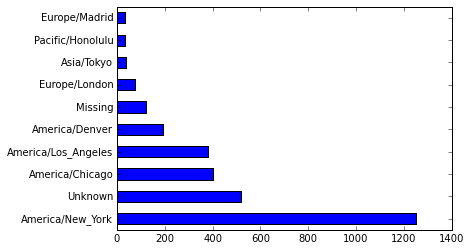

In [17]:
tz_counts[:10].plot(kind = 'barh', rot = 0)

## NumPy基础
### ndarray 多维数组对象

In [34]:
data = np.array([[0.9526,-0.246,-0.8856],[0.5639,0.2379,0.9104]])
print data

[[ 0.9526 -0.246  -0.8856]
 [ 0.5639  0.2379  0.9104]]


In [35]:
print data * 10
print data + data

[[ 9.526 -2.46  -8.856]
 [ 5.639  2.379  9.104]]
[[ 1.9052 -0.492  -1.7712]
 [ 1.1278  0.4758  1.8208]]


In [36]:
data.shape

(2L, 3L)

In [38]:
data1 = [6, 7.6, 8, 0, 1]
arr1 = np.array(data1)
print arr1

[ 6.   7.6  8.   0.   1. ]


In [39]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
print arr2

[[1 2 3 4]
 [5 6 7 8]]


In [40]:
print arr2.ndim
print arr2.shape

2
(2L, 4L)


In [43]:
print np.zeros(10)
print np.zeros((3,6))
print np.empty((2,3,2))
print np.ones((2,3))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[[  3.23785921e-319   6.36598737e-314]
  [  0.00000000e+000   1.27319747e-313]
  [  1.27319747e-313   1.27319747e-313]]

 [[  2.96439388e-323   1.90979621e-313]
  [  0.00000000e+000   2.75859453e-313]
  [  6.91691904e-323   3.60739284e-313]]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [45]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])